In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

In [23]:
# 生成人工数据集
n_train, n_test, ture_w, ture_b = 100, 100, [1.2,-3.4,5.6], 5
features = nd.random.normal(shape=(n_train+n_test,1))
ploy_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))
labels = (ture_w[0] * ploy_features[:, 0]+ture_w[1] * ploy_features[:, 1]+ture_w[2]*ploy_features[:,2]+ture_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [24]:
ploy_features


[[-6.52944982e-01  4.26337153e-01 -2.78374702e-01]
 [-1.27354205e-01  1.62190925e-02 -2.06556986e-03]
 [ 6.97750330e-01  4.86855537e-01  3.39703590e-01]
 [ 2.48513460e-01  6.17589392e-02  1.53479278e-02]
 [ 4.25999999e-01  1.81475997e-01  7.73087740e-02]
 [ 3.84636372e-02  1.47945143e-03  5.69050826e-05]
 [ 1.14119661e+00  1.30232966e+00  1.48621428e+00]
 [-1.26785183e+00  1.60744822e+00 -2.03800631e+00]
 [ 1.97532940e+00  3.90192628e+00  7.70758963e+00]
 [ 2.30898231e-01  5.33139929e-02  1.23101063e-02]
 [-1.60762057e-01  2.58444380e-02 -4.15480509e-03]
 [-5.42577147e-01  2.94389963e-01 -1.59729272e-01]
 [ 4.27609473e-01  1.82849869e-01  7.81883299e-02]
 [-7.78698683e-01  6.06371641e-01 -4.72180784e-01]
 [ 7.45459437e-01  5.55709779e-01  4.14259106e-01]
 [ 7.97629416e-01  6.36212707e-01  5.07461965e-01]
 [ 1.77454031e+00  3.14899325e+00  5.58801556e+00]
 [-5.02956033e-01  2.52964765e-01 -1.27230152e-01]
 [ 3.50189447e-01  1.22632653e-01  4.29446585e-02]
 [-9.30109262e-01  8.65103245e

In [19]:
def semilopy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5,2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals,y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [21]:
num_epochs , loss = 100, gloss.L2Loss()
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilopy(range(1, num_epochs+1), train_ls, 'epochs', 'loss',
             range(1, num_epochs+1), test_ls, ['train', 'test'])
    print('weight:',net[0].weight.data().asnumpy())
    print('bias:',net[0].bias.data().asnumpy())

final epoch: train loss 0.012375431 test loss 0.020405333
weight: [[ 1.4485905 -3.300776   5.495825 ]]
bias: [4.8960795]


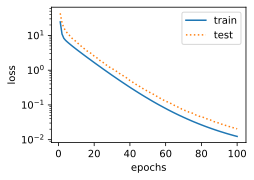

In [25]:
fit_and_plot(ploy_features[:n_train,:], ploy_features[n_train:,:],labels[:n_train], labels[n_train:])

final epoch: train loss 23.638456 test loss 36.285625
weight: [[12.77886]]
bias: [3.3647664]


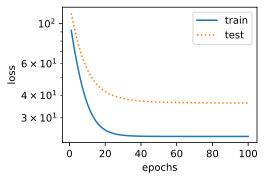

In [26]:
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train], labels[n_train:]) # 欠拟合

final epoch: train loss 2.0591369 test loss 132.48344
weight: [[-0.2817616]]
bias: [1.8621396]


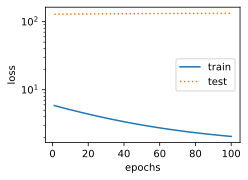

In [27]:
# 训练样本不足导致过拟合
fit_and_plot(features[:2,:],features[n_train:,:],labels[:2], labels[n_train:])